In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

### Parameters of Mulrivariate Gaussian 

In [2]:
mu_x1 = 0
mu_x2 = 0

variance_x1 = 1
variance_x2 = 4

SIGMA_x = [[variance_x1, 0], [0, variance_x2]]
MEAN_x = [mu_x1, mu_x2]
x_prior = st.multivariate_normal(MEAN_x, SIGMA_x)

In [3]:
# Defining grid where p(x1,x2) is evaluated

_x1 = np.linspace(-4,4,50)
_x2 = np.linspace(-4,4,50)
_x1, _x2 = np.meshgrid(_x1,_x2)

x_grid = np.empty(_x1.shape + (2,))
x_grid[:, :, 0] = _x1; x_grid[:, :, 1] = _x2

In [4]:
x_grid.shape

(50, 50, 2)

In [5]:
# p(x1,x2) evaluated for different values of x
p_of_x = x_prior.pdf(x_grid)

### Visualizing p(x)

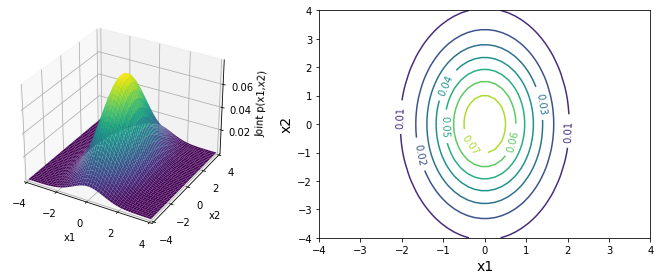

In [9]:
#%matplotlib notebook 
%matplotlib inline

fig = plt.figure(figsize=plt.figaspect(0.4))
#fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(_x1, _x2, p_of_x, cmap='viridis', linewidth=0)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Joint p(x1,x2)')

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)


ax2 = fig.add_subplot(1, 2, 2)
cp = ax2.contour(_x1, _x2, p_of_x)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_xlabel('x1', fontsize=14)
ax2.set_ylabel('x2', fontsize=14)

ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)

plt.tight_layout()
plt.show()

### Sampling from p(x)

In [10]:
x_samples = x_prior.rvs(size=50)
x_samples[:10]

array([[-1.27675264, -2.26256458],
       [-0.34196897,  1.22087601],
       [ 1.21588695, -4.87401907],
       [ 1.75966665, -4.26515571],
       [-0.23796804,  2.45654384],
       [ 1.08604187, -2.87068825],
       [-0.29797897,  1.33394462],
       [ 0.21452678, -1.92636626],
       [ 0.4603506 , -0.02669672],
       [-0.04616972,  3.72628238]])

### Visualize samples of p(x)

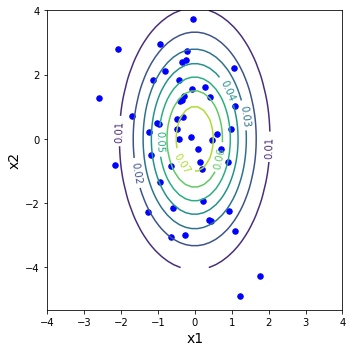

In [11]:
%matplotlib inline

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

cp = ax1.contour(_x1, _x2, p_of_x)
ax1.clabel(cp, inline=True, fontsize=10)
ax1.scatter(x_samples[:,0], x_samples[:,1], c='b', marker='o', s=30)
ax1.set_xlabel('x1', fontsize=14)
ax1.set_ylabel('x2', fontsize=14)

plt.tight_layout()

### Question
1. Change parameters of the covariance matrix to find scenarios in which x1 and x2 random variables are independent, positively correlated and negatively correlated.
2. Are there any restrictions on the values of the covariance matrix? Discuss.